In [1]:
pwd

'C:\\Users\\kucha\\Desktop\\Personal Projects\\01 - TUTORIALS\\CADS bootcamp problem sets\\CADS-2022-Bootcamp-JDS-Cohort-2-Capstone-Project'

# 1. Objective

- Design a **predictive model to determine potential customers who will make a purchase if we send them advertisements.** The target variable is `Potential_Customer`. 

## 1.1 Import packages and data

In [2]:
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 80)

# preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# modelling packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# model evaluation
from sklearn.model_selection import GridSearchCV, cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# to create model object
import pickle

In [27]:
df = pd.read_csv('data.csv', na_filter = True)

In [28]:
df.shape

(4469, 25)

In [29]:
df.head()

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,InAct_Last,InAct_First,Ad_Res_1_year,Ad_Res_3_Year,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,1,9946,$5.00,2,17,2,4,$0.00,$7.50,$7.76,$7.50,14,110,32,48,73,3,12,16,A,0,71.00,F,H,"$65,957.00"
1,1,87939,$30.00,1,7,0,3,$25.00,$25.00,$13.00,NaN,18,75,13,35,55,6,6,22,A,1,7.00,M,U,$0.00
2,0,88003,NaN,5,12,3,5,$15.00,$15.00,$11.25,$14.67,19,57,14,35,53,6,17,22,S,1,79.00,F,U,$0.00
3,1,188721,$20.00,1,11,0,3,$20.00,$20.00,$12.45,NaN,5,113,17,38,71,8,8,33,A,0,73.00,F,U,"$76,293.00"
4,1,88056,$5.00,3,15,2,7,$3.00,$4.33,$3.80,$4.00,17,118,13,28,63,6,12,24,S,1,68.00,F,H,"$113,663.00"


# 2. Data Cleaning

## 2.1 Check for correct data types

We notice that several columns (e.g., `Potential_Customer`,`Status_Cust`, `Status_Latest_Ad`,`C_ID`, `Gender`, `Cust_Prop`) have the wrong data types. They ought to be `categorical` data but are instead of the `object`/`integer`/`float` data type. Additionally, several columns have values with `$` signs.  Hence, we'll adjust this. 

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4469 entries, 0 to 4468
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Potential_Customer        4469 non-null   int64  
 1   C_ID                      4469 non-null   int64  
 2   Cust_Last_Purchase        2149 non-null   object 
 3   Pur_3_years               4469 non-null   int64  
 4   Pur_5_years               4469 non-null   int64  
 5   Pur_3_years_Indirect      4469 non-null   int64  
 6   Pur_5_years_Indirect      4469 non-null   int64  
 7   Pur_latest                4469 non-null   object 
 8   Pur_3_years_Avg           4469 non-null   object 
 9   Pur_5_years_Avg           4469 non-null   object 
 10  Pur_3_years_Avg_Indirect  3642 non-null   object 
 11  InAct_Last                4469 non-null   int64  
 12  InAct_First               4469 non-null   int64  
 13  Ad_Res_1_year             4469 non-null   int64  
 14  Ad_Res_3

### 2.1.1 Remove the dollar sign and comma from data

In [31]:
df.Cust_Last_Purchase=df.Cust_Last_Purchase.str.replace('$', '')
df.Pur_latest=df.Pur_latest.str.replace('$', '')
df.Pur_3_years_Avg=df.Pur_3_years_Avg.str.replace('$', '')
df.Pur_5_years_Avg=df.Pur_5_years_Avg.str.replace('$', '')
df.Pur_3_years_Avg_Indirect=df.Pur_3_years_Avg_Indirect.str.replace('$', '')
df.Cust_Ann_Income=df.Cust_Ann_Income.str.replace('$', '')
df.Cust_Ann_Income=df.Cust_Ann_Income.str.replace(',', '')

### 2.1.2 Correct data types

In [32]:
df.head()

,Potential_Customer,C_ID,Cust_Last_Purchase,Pur_3_years,Pur_5_years,Pur_3_years_Indirect,Pur_5_years_Indirect,Pur_latest,Pur_3_years_Avg,Pur_5_years_Avg,Pur_3_years_Avg_Indirect,InAct_Last,InAct_First,Ad_Res_1_year,Ad_Res_3_Year,Ad_Res_5_Year,Ad_Res_Ind_1_Year,Ad_Res_Ind_3_Year,Ad_Res_Ind_5_Year,Status_Cust,Status_Latest_Ad,Age,Gender,Cust_Prop,Cust_Ann_Income
0,1,9946,5.00,2,17,2,4,0.00,7.50,7.76,7.50,14,110,32,48,73,3,12,16,A,0,71.00,F,H,65957.00
1,1,87939,30.00,1,7,0,3,25.00,25.00,13.00,NaN,18,75,13,35,55,6,6,22,A,1,7.00,M,U,0.00
2,0,88003,NaN,5,12,3,5,15.00,15.00,11.25,14.67,19,57,14,35,53,6,17,22,S,1,79.00,F,U,0.00
3,1,188721,20.00,1,11,0,3,20.00,20.00,12.45,NaN,5,113,17,38,71,8,8,33,A,0,73.00,F,U,76293.00
4,1,88056,5.00,3,15,2,7,3.00,4.33,3.80,4.00,17,118,13,28,63,6,12,24,S,1,68.00,F,H,113663.00


In [33]:
CatCols=['Potential_Customer','Status_Cust', 'Status_Latest_Ad','C_ID',
         'Gender', 'Cust_Prop']
NumCols=list(set(df.columns)-set(CatCols))

df[CatCols] = df[CatCols].apply(lambda x: x.astype('category'))
df[NumCols] = df[NumCols].apply(lambda x: x.astype('float64'))

# final check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4469 entries, 0 to 4468
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Potential_Customer        4469 non-null   category
 1   C_ID                      4469 non-null   category
 2   Cust_Last_Purchase        2149 non-null   float64 
 3   Pur_3_years               4469 non-null   float64 
 4   Pur_5_years               4469 non-null   float64 
 5   Pur_3_years_Indirect      4469 non-null   float64 
 6   Pur_5_years_Indirect      4469 non-null   float64 
 7   Pur_latest                4469 non-null   float64 
 8   Pur_3_years_Avg           4469 non-null   float64 
 9   Pur_5_years_Avg           4469 non-null   float64 
 10  Pur_3_years_Avg_Indirect  3642 non-null   float64 
 11  InAct_Last                4469 non-null   float64 
 12  InAct_First               4469 non-null   float64 
 13  Ad_Res_1_year             4469 non-null   float6

## 2.2 Check for duplicates

In [34]:
# check for duplicates
len(df[df.duplicated(subset=None, keep=False)])

1702

In [35]:
# # 851 duplicate rows dropped
df=df.drop_duplicates()
df.shape

(3618, 25)

## 2.3 Drop `C_ID` column

In [37]:
df.drop('C_ID', axis=1, inplace=True)

# final check
df.shape

(3618, 24)

In [38]:
CatCols.remove('C_ID')

# final check
CatCols

['Potential_Customer',
 'Status_Cust',
 'Status_Latest_Ad',
 'Gender',
 'Cust_Prop']

# 3. EDA

## 3.1 Explore Categorical Variables

In [41]:
df.describe(include=('category'))

,Potential_Customer,Status_Cust,Status_Latest_Ad,Gender,Cust_Prop
count,3618,3618,3618,3618,3618
unique,2,6,2,3,2
top,0,A,1,F,H
freq,1882,2146,2057,1922,1981


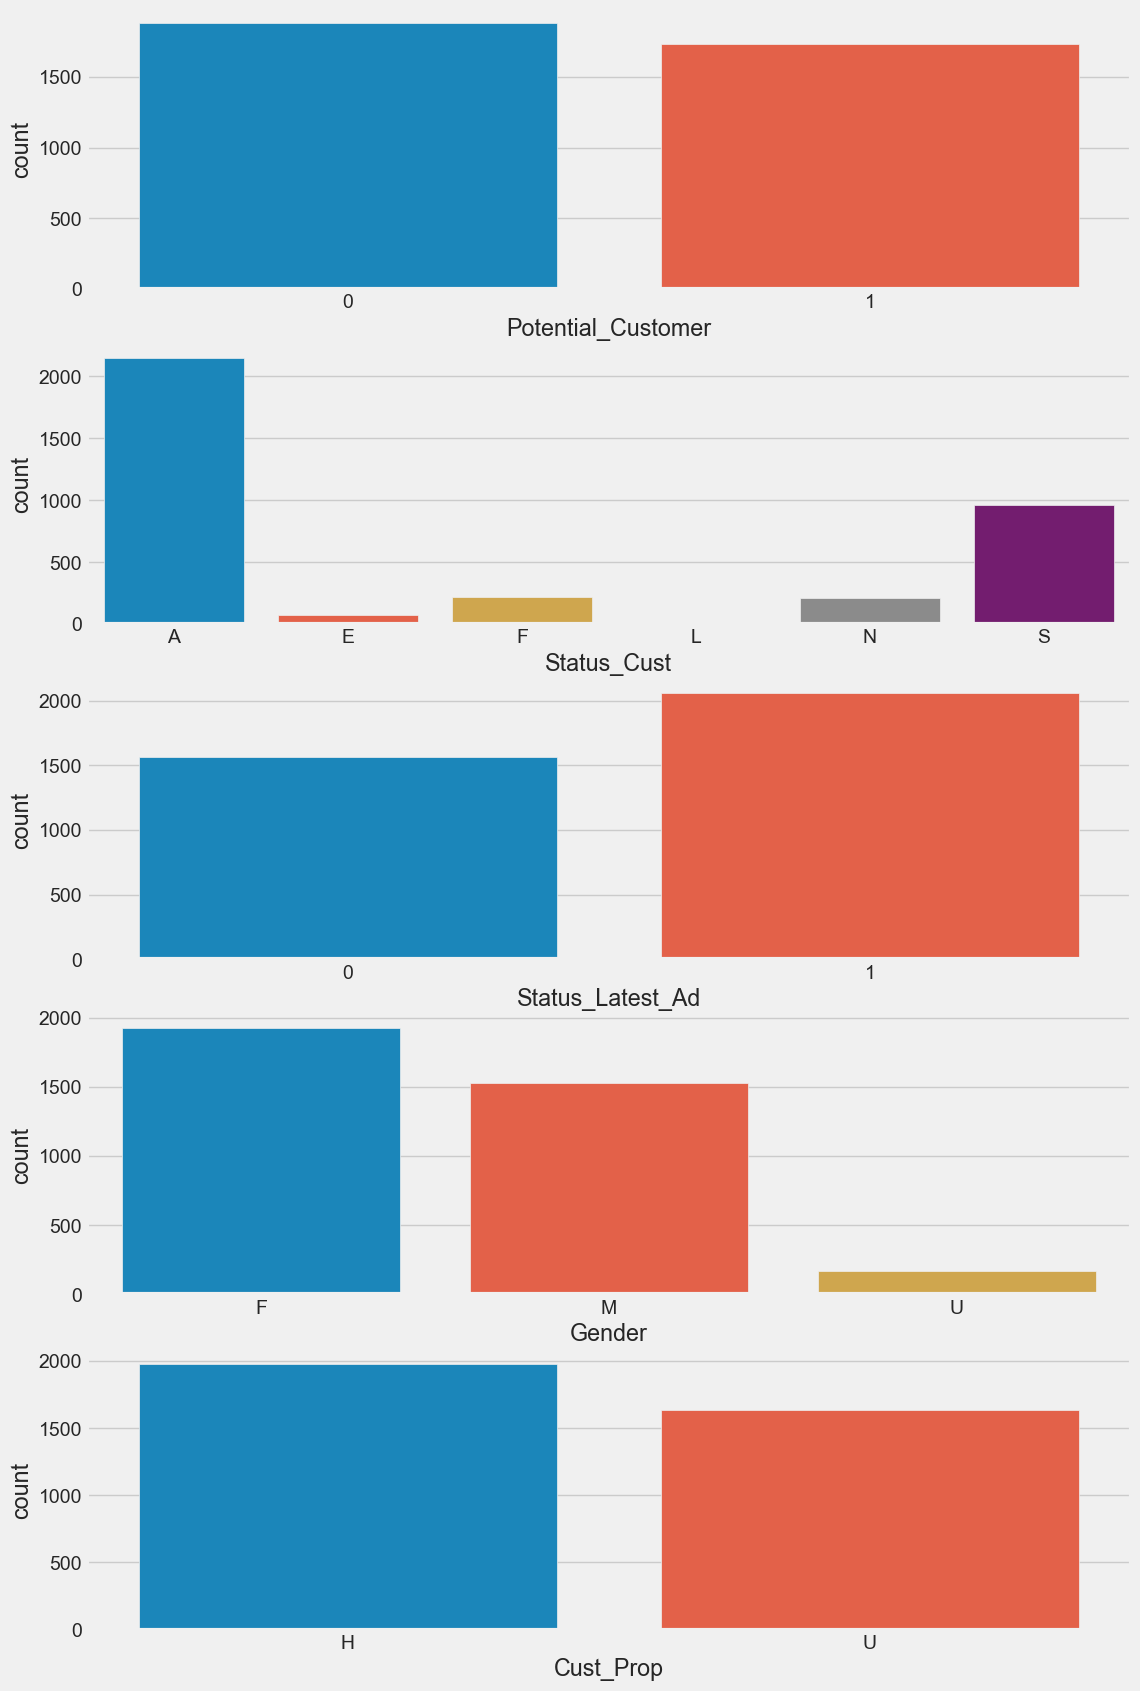

In [43]:
fig, ax=plt.subplots(nrows=len(CatCols), figsize=(12,20))
for i in np.arange(len(CatCols)): 
    sns.countplot(x=df[CatCols[i]],ax=ax[i]);

From the Bar plots below, we notice that `Status_Cust` has too many categories, with very small values. Hence, we'll using binning to reduce the number of categories. 

In [44]:
mapper = {'A':'A',
          'S':'S' ,
          'E': 'other', 
          'F': 'other',
          'N':'other',
          'L':'other' }

df['Status_Cust_new'] = df['Status_Cust'].replace(mapper)
CatCols = CatCols + ['Status_Cust_new']
CatCols.remove('Status_Cust')

## 3.2 Explore Continuous Variables

From the charts below, we glean the following insights: 
- Some variables are highly skewed and we may use the log of them after filling missing values with median or other appropriate values.
- Some variables have outliers we should decide to remove/fix/keep them.
- We notice some values are close to zero in the `Age` column, which signals us to investigate further.
- Some values in the `Cust_Ann_Income` column appear to be close to zero. This also signals us to investigate further. 

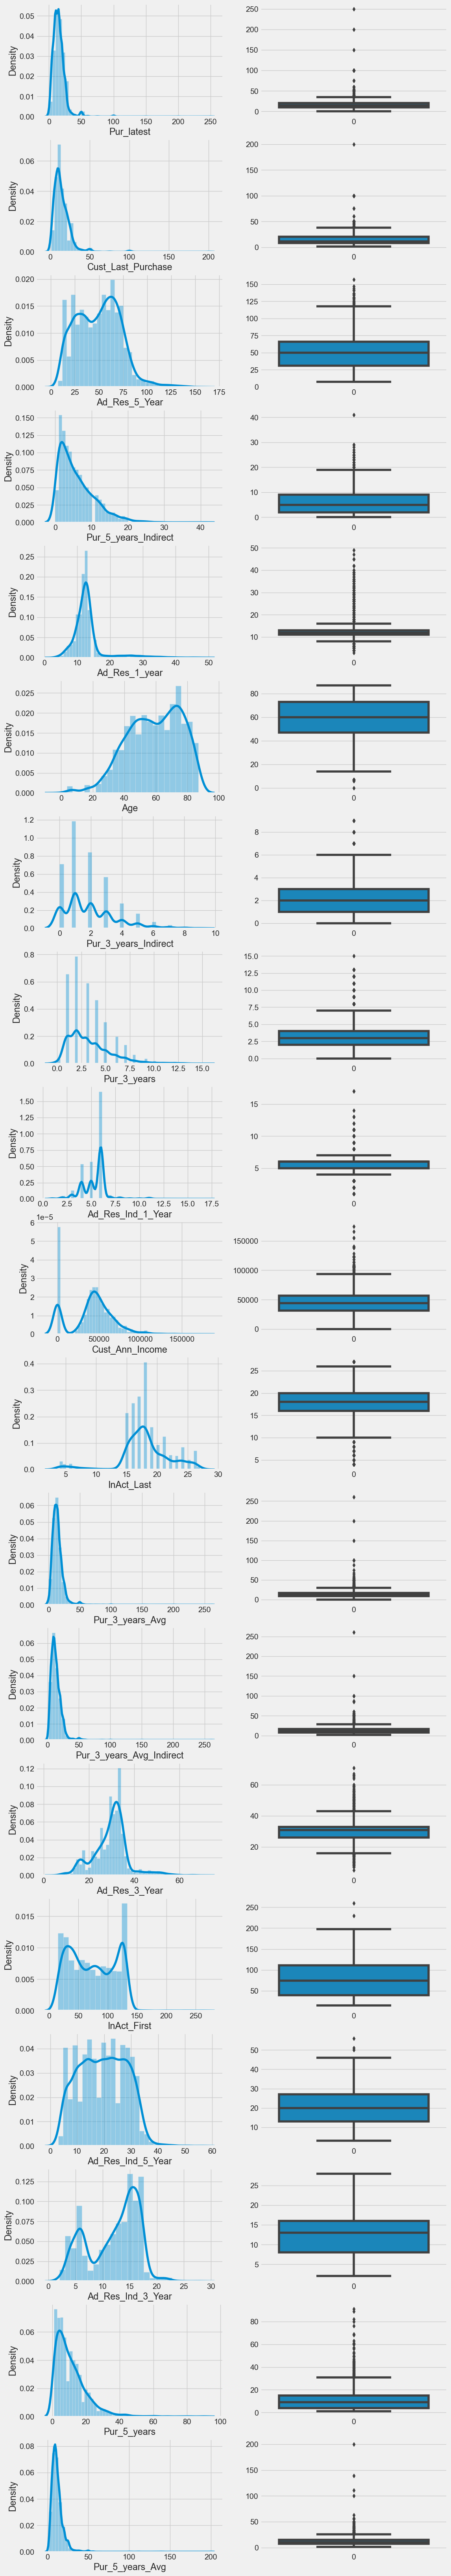

In [46]:
fig, ax=plt.subplots(nrows=len(NumCols), ncols=2, figsize=(12,80))
for i in range(len(NumCols)):
    sns.distplot(df[NumCols[i]],ax=ax[i,0])
    sns.boxplot(df[NumCols[i]],ax=ax[i,1]);

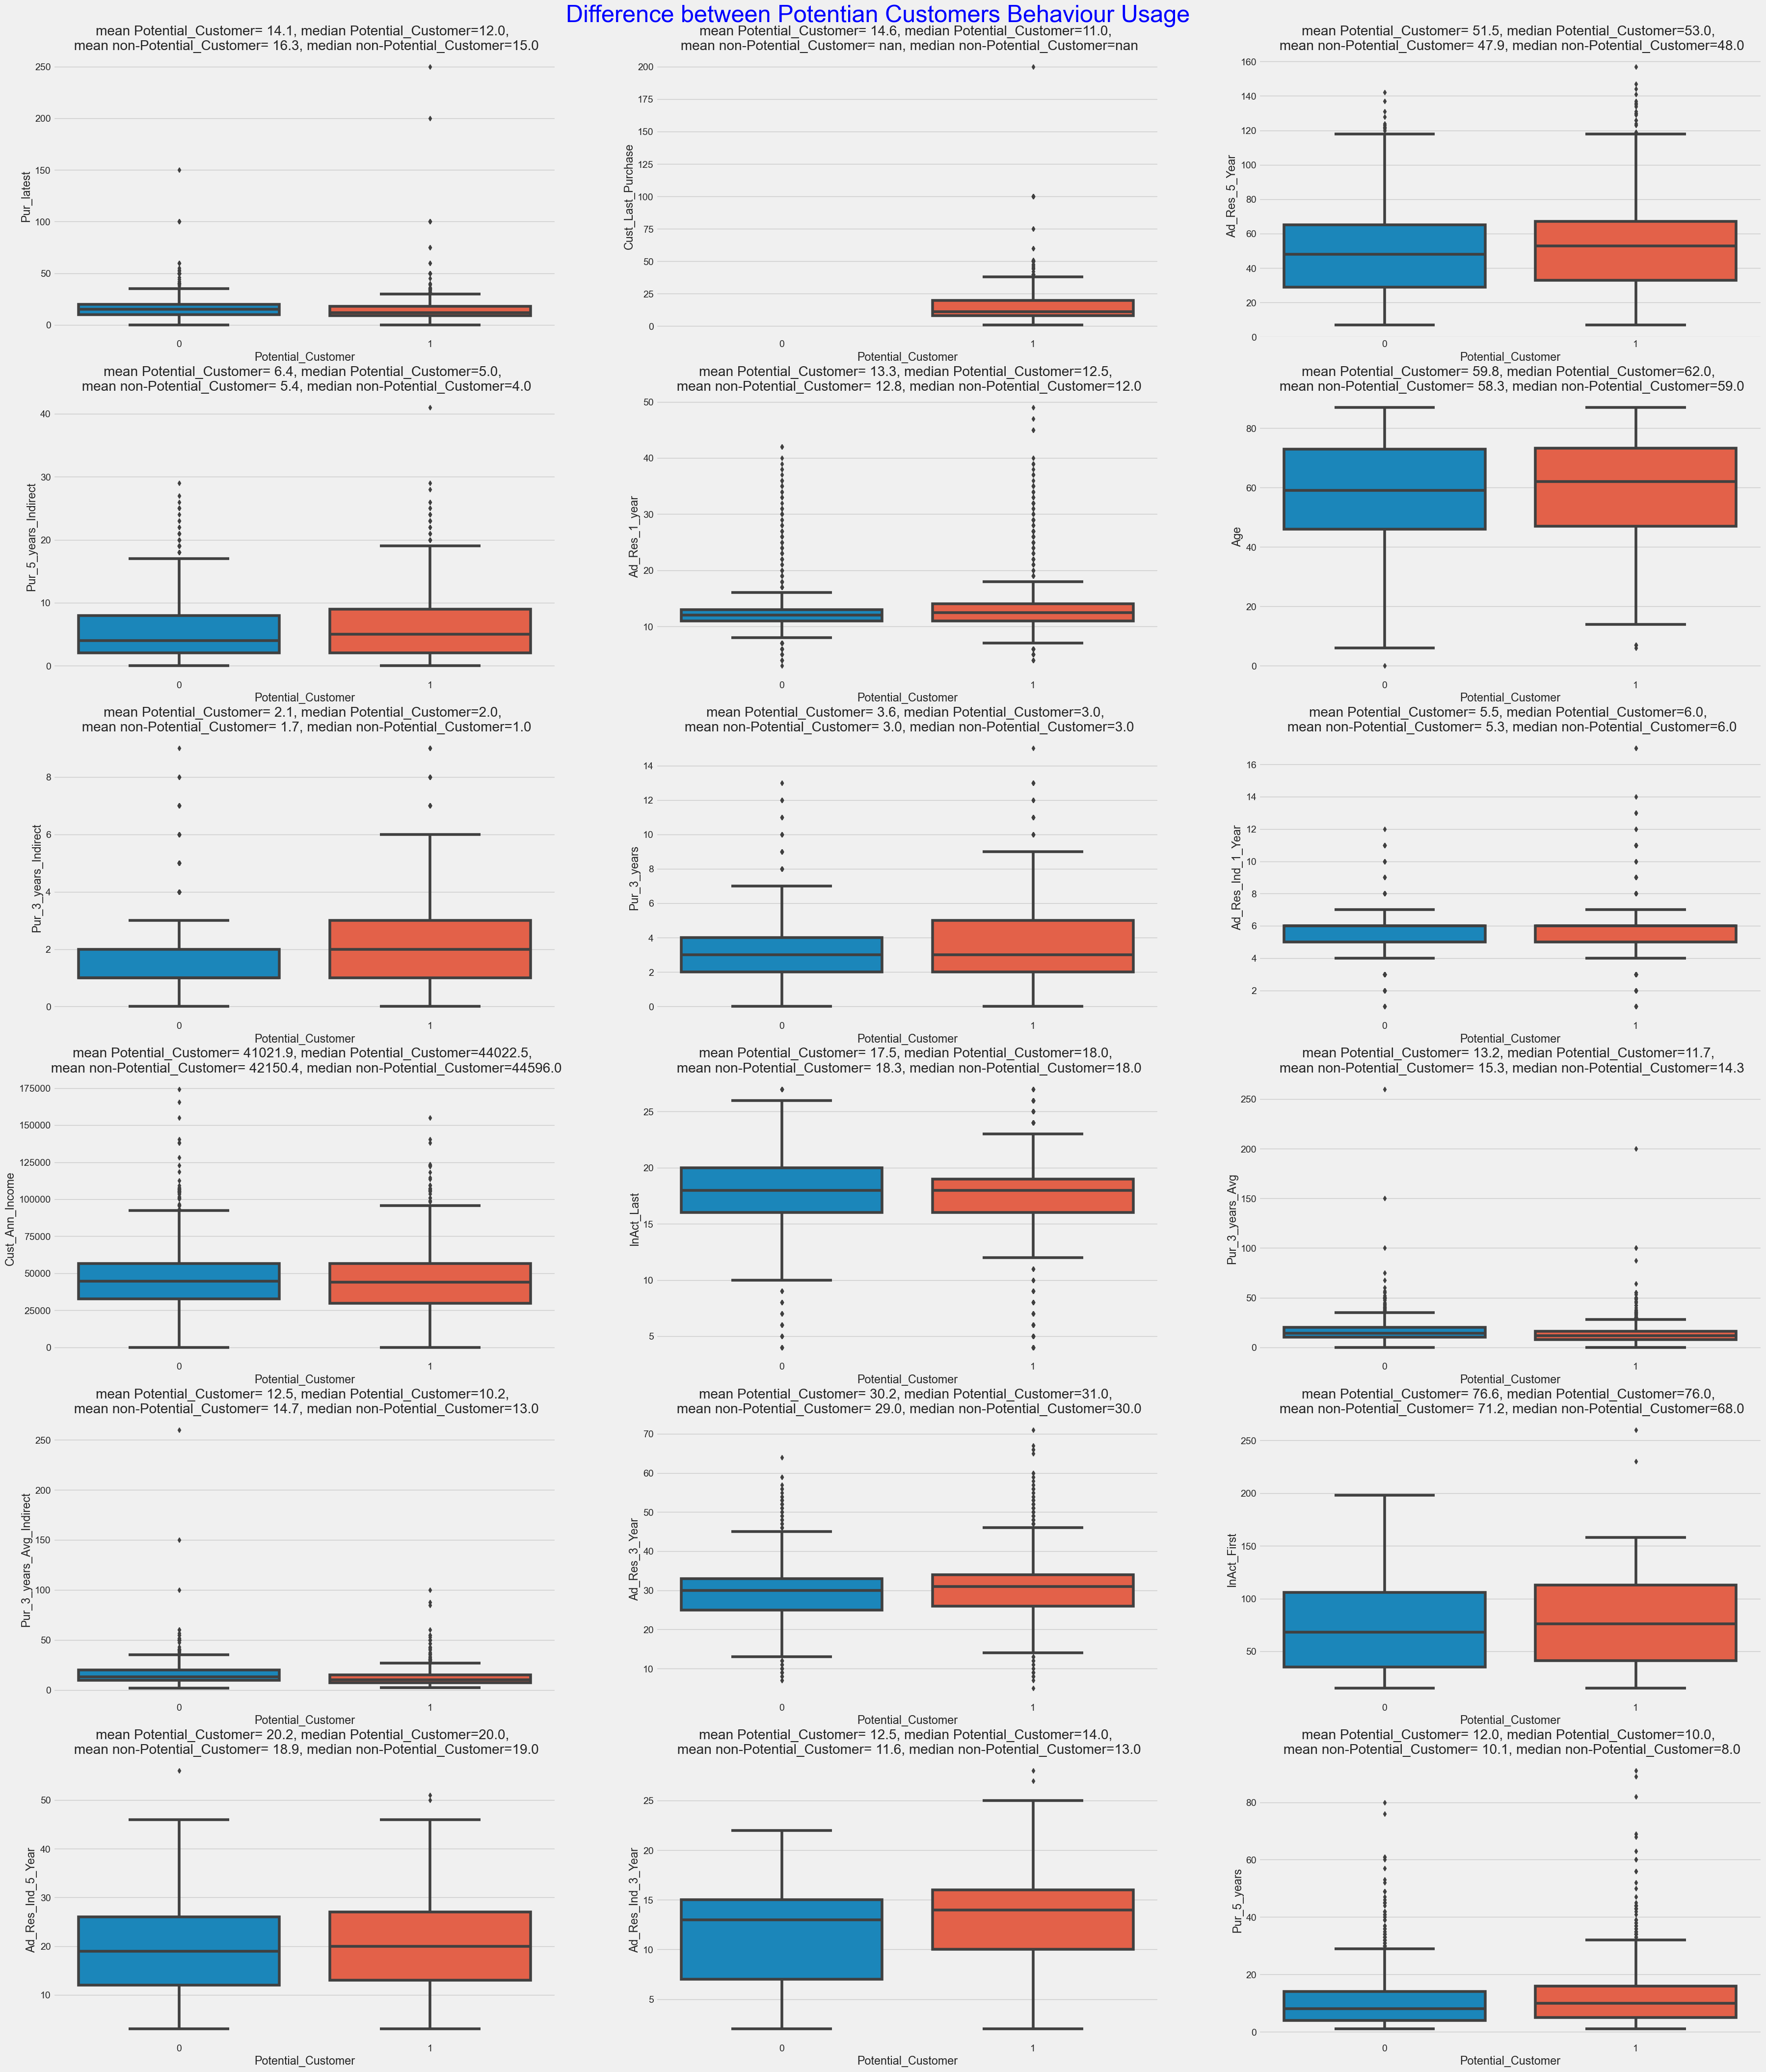

In [57]:
ncols=int(len(NumCols)/6)
fig , axes= plt.subplots(ncols=ncols, nrows=6, figsize=(40,50))
fig.suptitle('Difference between Potentian Customers Behaviour Usage',y=.9, fontsize=35, color='b')
for j in np.arange(0,6):
    for c in np.arange(0,ncols):
        sns.boxplot(x='Potential_Customer',y=df[NumCols[c+j*3]],data=df, ax=axes[j,c]).\
    set_title('mean Potential_Customer= {:.1f}, median Potential_Customer={:.1f}, \n mean non-Potential_Customer= {:.1f}, median non-Potential_Customer={:.1f}'.\
                             format(df[df.Potential_Customer==1][NumCols[c+j*3]].mean(), 
                                    df[df.Potential_Customer==1][NumCols[c+j*3]].median(),
                                    df[df.Potential_Customer==0][NumCols[c+j*3]].mean(), 
                                    df[df.Potential_Customer==0][NumCols[c+j*3]].median()))
plt.show()

# 4. Feature Engineering

In [ ]:
# Creating 
data['Pur_5_years_Total']=data['Pur_5_years']*data['Pur_5_years_Avg']

# Creating 
data['Ad_Res_Rate_3_years']=data['Pur_3_years']/(data['Ad_Res_3_Year']+data['Ad_Res_Ind_3_Year']+1)

# Since the majority of our data is positively skewed, we'll employ logarithmic transformation to -
# transform a highly skewed variable into a more normalized dataset.
data['log_Pur_3_years_Indirect']=np.log(data['Pur_3_years_Indirect']+1)
data['log_Pur_latest']=np.log(data['Pur_latest']+1)
data['log_Pur_3_years']=np.log(data['Pur_3_years']+1)
data['log_Pur_3_years_Avg_Indirect']=np.log(data['Pur_3_years_Avg_Indirect']+1)
data['log_Pur_5_years_Indirect']=np.log(data['Pur_5_years_Indirect']+1)
data['log_Pur_3_years_Avg']=np.log(data['Pur_3_years_Avg']+1)
data['log_Pur_5_years']=np.log(data['Pur_5_years']+1)
data['log_Ad_Res_Rate_3_years']=np.log(data['Ad_Res_Rate_3_years']+1)
data['log_Pur_5_years_Total']=np.log(data['Pur_5_years_Total']+1)
data['log_Pur_3_years_Total']=np.log(data['Pur_3_years_Total']+1)

NewCols=['Pur_3_years_Total', 'Pur_5_years_Total', 'Ad_Res_Rate_3_years',
         'log_Pur_3_years_Indirect','log_Pur_latest','log_Pur_3_years',
         'log_Pur_3_years_Avg_Indirect','log_Pur_5_years_Indirect',
        'log_Pur_3_years_Avg','log_Pur_5_years','log_Ad_Res_Rate_3_years',
        'log_Pur_5_years_Total','log_Pur_3_years_Total']

NewNumCols=NewCols+NumCols

In [ ]:
data[NewCols+['Potential_Customer']].groupby('Potential_Customer').median().T